<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/CNN/TOP%20Projects/CIFAR%20Image%20Classification/CIFAR_10_IMAGE_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


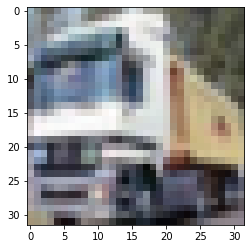

<Figure size 14400x7200 with 0 Axes>

In [17]:
plt.imshow(X_train[1])
plt.figure(figsize=(200,100))
plt.show()

In [18]:
print(y_train[1])

[9]


In [19]:
def preprocss(img):
  img=img.astype('float32')
  img=img/255.0

  return img

In [20]:
X_train=preprocss(X_train)
X_test=preprocss(X_test)

In [30]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [32]:
print(y_test.shape[1])

10


In [33]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [34]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [35]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 208s 133ms/step - loss: 1.7129 - accuracy: 0.3757 - val_loss: 1.1641 - val_accuracy: 0.5839
Epoch 2/10
1563/1563 [==============================] - 207s 133ms/step - loss: 1.1555 - accuracy: 0.5881 - val_loss: 1.1141 - val_accuracy: 0.6098
Epoch 3/10
1563/1563 [==============================] - 211s 135ms/step - loss: 1.0233 - accuracy: 0.6375 - val_loss: 1.0021 - val_accuracy: 0.6544
Epoch 4/10
1563/1563 [==============================] - 211s 135ms/step - loss: 0.9485 - accuracy: 0.6627 - val_loss: 0.9358 - val_accuracy: 0.6737
Epoch 5/10
1563/1563 [==============================] - 210s 134ms/step - loss: 0.8983 - accuracy: 0.6853 - val_loss: 0.9109 - val_accuracy: 0.6855
Epoch 6/10
1563/1563 [==============================] - 210s 135ms/step - loss: 0.8585 - accuracy: 0.6950 - val_loss: 0.9181 - val_accuracy: 0.6829
Epoch 7/10
1563/1563 [==============================] - 211s 135ms/step - loss: 0.8087 - accuracy: 0.7142 - val_

In [39]:
y_pred=model.predict(X_test)
y_pred

array([[3.1241272e-03, 2.6148194e-04, 3.2777201e-02, ..., 4.6475772e-03,
        2.2065518e-02, 3.5616709e-04],
       [1.1604759e-02, 1.8031791e-01, 2.6221778e-06, ..., 1.9361561e-09,
        8.0797929e-01, 9.5278236e-05],
       [9.3338169e-02, 9.8215483e-02, 1.2801434e-02, ..., 1.0989299e-03,
        7.5065947e-01, 3.2739133e-02],
       ...,
       [4.0899394e-03, 6.2378102e-05, 2.1559061e-01, ..., 4.5139518e-02,
        1.4096814e-03, 8.4152445e-05],
       [8.5130014e-02, 3.0996132e-01, 4.7236282e-02, ..., 9.8235216e-03,
        1.8562580e-02, 2.5060044e-03],
       [7.4976861e-06, 8.4109428e-07, 6.6458574e-04, ..., 9.3217582e-01,
        5.3256753e-07, 8.0615137e-06]], dtype=float32)

In [40]:
y_pred_final=np.argmax(y_pred,axis=-1)
y_pred_final

array([5, 8, 8, ..., 5, 4, 7])

In [42]:
y_test=np.argmax(y_test,axis=-1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

length=range(10) # Epochs

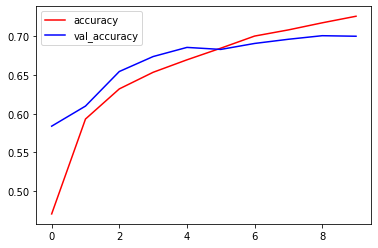

In [37]:
  import matplotlib.pyplot as plt

plt.plot(length,acc,color='red',label='accuracy')
plt.plot(length,val_acc,color='blue',label='val_accuracy')
plt.legend()

plt.show()

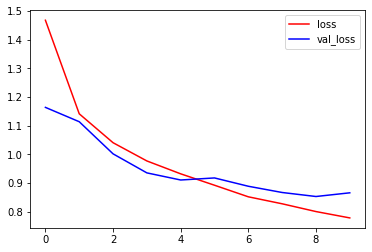

In [38]:
import matplotlib.pyplot as plt

plt.plot(length,loss,color='red',label='loss')
plt.plot(length,val_loss,color='blue',label='val_loss')
plt.legend()

plt.show()